# Image to ASCII Art Convertor

Aaryesh Baleri (Roll No: 210123081)

# Motivation

ASCII art is a graphic design technique that uses computers for presentation and consists of pictures pieced together from the characters defined by the ASCII Standard from 1963 and ASCII compliant character sets with proprietary extended characters (beyond the 128 characters of standard 7-bit ASCII). The term is also loosely used to refer to text-based visual art in general.

The widespread usage of ASCII art can be traced to the computer bulletin board systems of the late 1970s and early 1980s. The limitations of computers of that time period necessitated the use of text characters to represent images. Along with ASCII's use in communication, however, it also began to appear in the underground online art groups of the period.

Upon learning upon the image processing teachnique of making a binary image using the characteristic function,

$$b(x, y) =
  \begin{cases}
      \hfill 0   \hfill & \text{ if g(x, y) < T} \\
      \hfill 1 \hfill & \text{ if g(x, y) $\geq$ T} \\
  \end{cases}$$

I wondered if instead of mapping intensity values at a specific pixel position to {0, 1}, we could map intensity values to a specific ASCII character from a ASCII character set, heavily simplifying the process of creating ASCII art.


# Code Demo and Visualization

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Uploading the image to convert to ASCII art

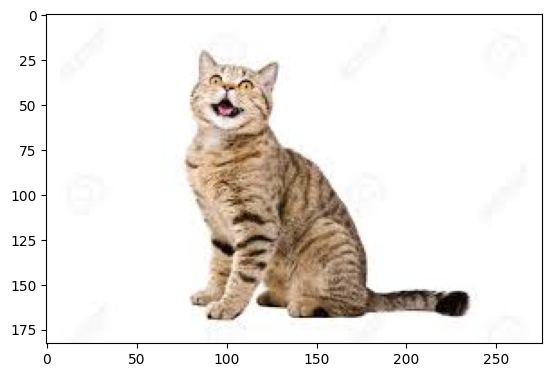

(183, 276, 3)

In [2]:
im = plt.imread('sampleimagecat.jpeg')
plt.imshow(im)
plt.show()
im.shape

# Converting Image to Grayscale

In [3]:
def img_to_grayscale(im):
  im_temp = im.mean(axis=2)
  return im_temp

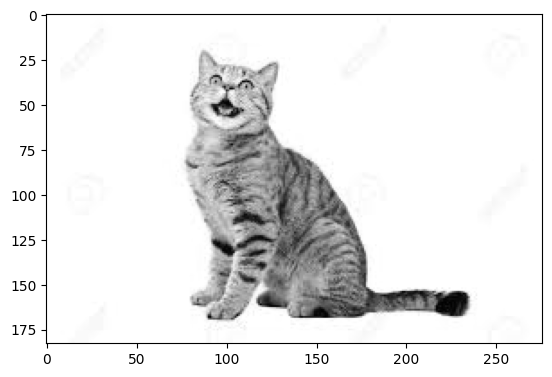

In [4]:
im_gs = img_to_grayscale(im)
plt.imshow(im_gs, cmap='gray')
plt.show()

# Defining the intensity to ASCII character mapping

In [5]:
def get_ascii_chars(pixel_value, char_set):
  length = len(char_set)
  index = int((pixel_value / 255) * (length - 1))
  return char_set[index]

# Converting Image to ASCII Character

Note: the below code block uses a different method to convert image to grayscale to ensure the image remains consistent with respect to PIL library functions.

In [6]:
def img_to_ascii(im_path, width, char_set):
  im = Image.open(im_path)
  im = im.convert("L")
  original_width, original_height = im.size
  aspect_ratio = original_height / original_width
  new_height = int(aspect_ratio * width * 0.55)
  new_width = width
  resized_im = im.resize((new_width, new_height))
  plt.imshow(resized_im)
  plt.show()
  im_ascii = []
  for i in range(new_height):
    row = []
    for j in range(new_width):
      pixel = resized_im.getpixel((j, i))
      row.append(get_ascii_chars(pixel, char_set))
    im_ascii.append("".join(row))
  return "\n".join(im_ascii)

# Defining character set and running conversion

The character set is arranged in descreasing order of intensity

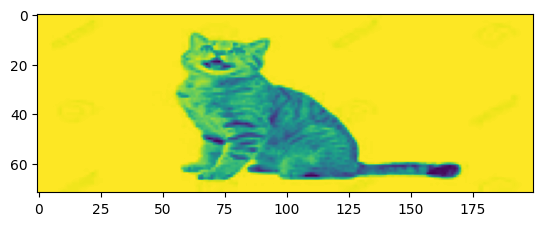

.....................''..............................................................................................................''...'.............................................................
....................'''''............................................................................................................''..'`'............................................................
.................''''''''''...........................................................................................................'``''.............................................................
.................'.''^"`'''.........................................''.....'''.....................................................'''`^^`.........................................'''''.....'''........
..................'`^^`''''.......................................''''`````'''....................................................''''`^^'............................................'``````''.....

In [7]:
DEFAULT_CHARS = "$@B%8&WM#*oahkbdpqwmZO0QLCJUYXzcvunxrjft/\|()1{}[]?-_+~<>i!lI;:,\"^`'."
im_ascii = img_to_ascii('sampleimagecat.jpeg', 200, DEFAULT_CHARS)
print(im_ascii)

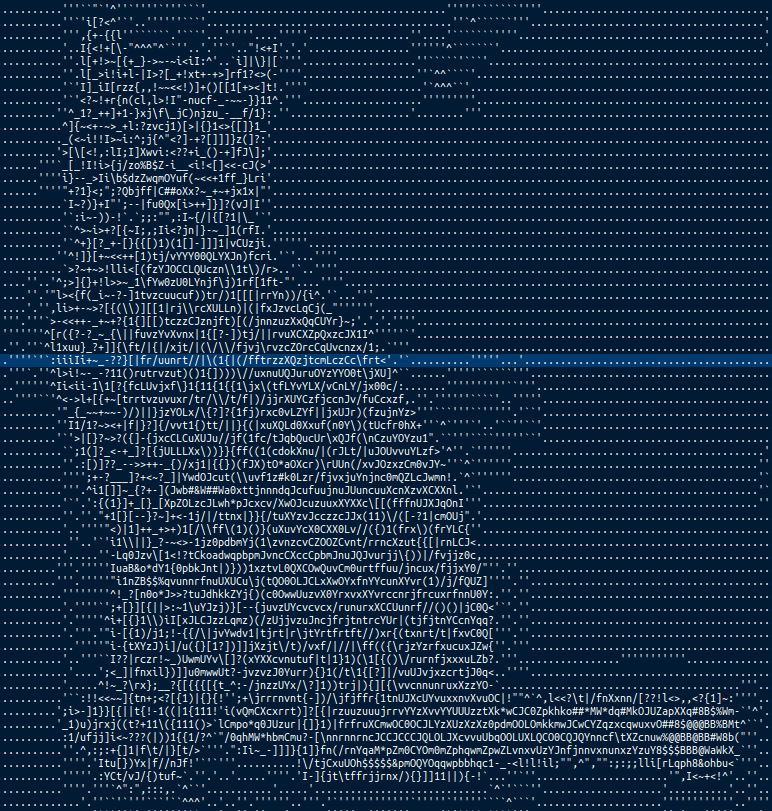

# Reflections

The quality of the ASCII art is high dependent upon the character set which is picked for image. A small character set tends to not do well with highly complex images.

Images with plain backgrounds also product better ASCII conversions compared to images with complex backgrounds.